In [ ]:
! nvidia-smi
! pip install min-dalle

Mon Jul 25 17:17:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
dtype = "float32" #@param ["float32", "float16", "bfloat16"]
from IPython.display import display, update_display
import torch
from min_dalle import MinDalle

model = MinDalle(
    dtype=getattr(torch, dtype),
    device='cuda',
    is_mega=True, 
    is_reusable=True
)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


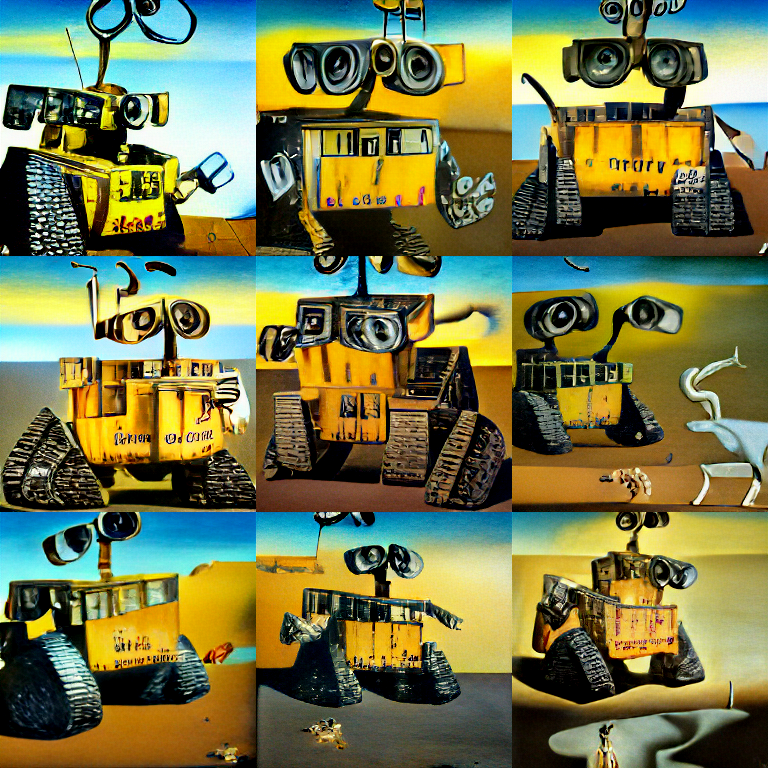

CPU times: user 32.7 s, sys: 1.01 s, total: 33.7 s
Wall time: 33.7 s


In [ ]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
progressive_outputs = True #@param {type:"boolean"}
seamless = False #@param {type:"boolean"}
grid_size = 3 #@param {type:"integer"}
temperature = 8.52 #@param {type:"slider", min:0.01, max:16, step:0.01}
supercondition_factor = 16 #@param {type:"number"}
top_k = 128 #@param {type:"integer"}

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    progressive_outputs=progressive_outputs,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False